In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools # Importando itertools para generar combinaciones de columnas
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.patches as mpatches
import payments_manager as pm

cr_cp = pm.df('cr_cp')
fe_cp = pm.df('fe_cp')
df_jo = pm.df('df_jo')

#df_jo = pm.sort("df_jo", ["id_cr"]).reset_index()
df_jo = pm.sort("df_jo", ['created_at','created_at_fe']).reset_index()
df_jo = df_jo.drop(columns=['index'])

#df_jo = df_jo.drop(columns=['Mes_created_at'])
df_jo_cp = df_jo.copy()
df_jo_cp['cr_received_date'] = df_jo_cp.cash_request_received_date
#df_jo.info()
pd.options.display.max_columns = None
display(df_jo.head(4))

,id_cr,id_fe,fe_cr_id,user_id,active,created_at,created_at_fe,amount,fee,stat_cr,stat_fe,transfer_type,type,to_receive_ini,to_receive_bank,to_reimbur,to_reimbur_cash,to_end,to_send,send_at,cr_received_date,money_back_date,reimbursement_date,paid_at,charge_moment,moderated_at,reason,category,from_date,to_date,recovery_status,updated_at,reco_creation,reco_last_update,updated_at_fe,Mes_created_at,cash_request_received_date,created_at_slot,created_at_slot_h,created_at_dow,needs_m_check,needs_m_check_recov,n_fees,n_backs,n_recovery,n_incidents,created_at_d,GBP_EUR,BTC_GBP,inflation,unemploy_rate
0,3,0,NaN,47,1,2019-11-19 13:57:53.511561,NaT,1.0,0.0,canceled,cr_regular,regular,nice,NaT,NaT,16 days 09:02:06.488439,NaT,NaT,NaT,NaT,NaT,NaT,2019-12-05 23:00:00.000000,NaT,NaN,2019-11-20 12:16:50.000000,NaN,NaN,NaT,NaT,nice,2020-12-14 10:25:57.710844,NaT,NaT,NaT,2019-11,NaT,7,13-Mañana,1,1,1,6,0,0,1,2019-11-19,1.16935,6347.577148,1.3,4.0
1,4,0,NaN,99001309,0,2019-12-09 14:47:35.190714,NaT,100.0,0.0,money_back,cr_regular,regular,nice,NaT,NaT,7 days 08:12:24.809286,NaT,0 days,NaT,NaT,NaT,2019-12-16 23:00:00,2019-12-16 23:00:00.000000,NaT,NaN,2019-12-09 14:58:28.000000,NaN,NaN,NaT,NaT,nice,2020-11-04 12:54:52.120014,NaT,NaT,NaT,2019-12,NaT,14,14-Tarde,0,0,0,0,1,0,0,2019-12-09,1.18803,5630.115723,1.3,4.0
2,5,0,NaN,804,1,2019-12-10 19:05:21.596873,NaT,100.0,0.0,rejected,cr_regular,regular,nice,NaT,NaT,29 days 23:59:59.999490,NaT,NaT,NaT,NaT,NaT,NaT,2020-01-09 19:05:21.596363,NaT,NaN,2019-12-11 16:47:42.405646,NaN,NaN,NaT,NaT,nice,2019-12-11 16:47:42.407830,NaT,NaT,NaT,2019-12,NaT,14,19-Tarde,1,1,1,0,0,0,1,2019-12-10,1.18800,5543.707520,1.3,4.0
3,6,0,NaN,812,1,2019-12-10 19:05:48.921042,NaT,100.0,0.0,direct_debit_rejected,cr_regular,regular,nice,0 days 04:54:11.078958,NaT,57 days 03:54:11.078958,NaT,NaT,NaT,NaT,2019-12-11,NaT,2020-02-05 23:00:00.000000,NaT,NaN,2019-12-11 09:40:33.000000,NaN,NaN,NaT,NaT,pending,2020-12-18 22:47:47.993817,2020-03-20 14:12:53.208246,2020-12-18 22:47:48.008850,NaT,2019-12,2019-12-11,14,19-Tarde,1,1,1,0,0,1,1,2019-12-10,1.18800,5543.707520,1.3,4.0


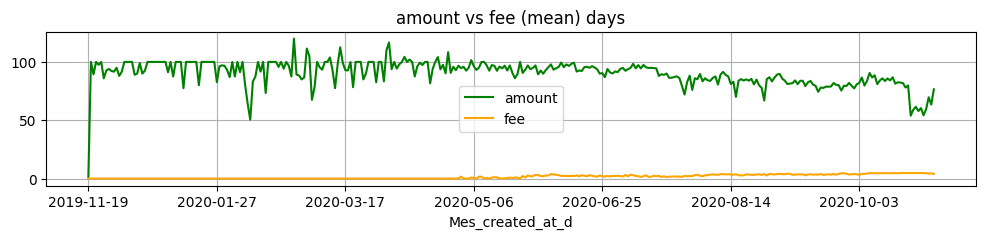

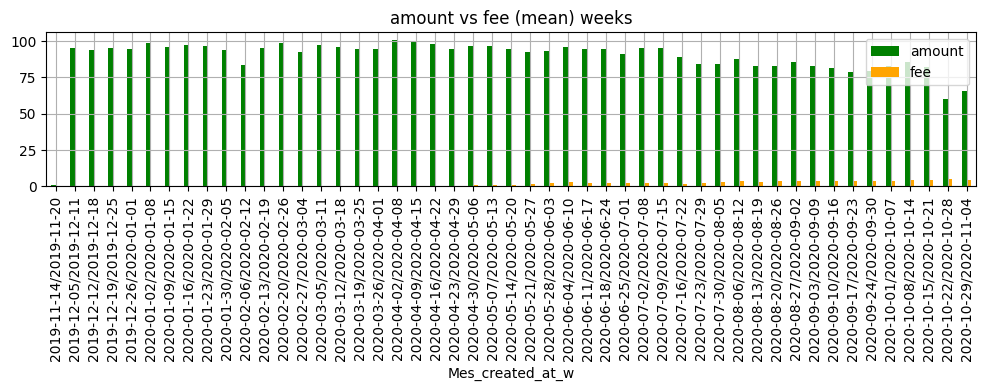

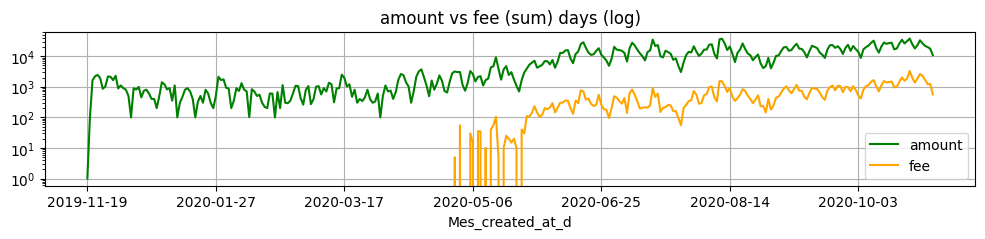

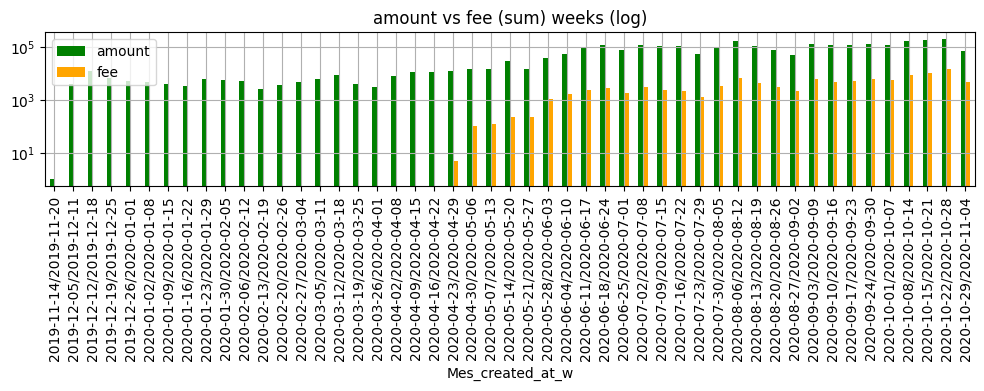

In [165]:
#df_jo.info()
#display(df_jo)

df_t = pm.df('df_jo')
df_t['Mes_created_at_d'] = df_t['created_at'].dt.to_period('d').astype(str)
df_t['Mes_created_at_w'] = df_t['created_at'].dt.to_period('W-WED').astype(str)
df_t['Mes_created_at_m'] = df_t['created_at'].dt.to_period('M').astype(str)

fig, ax= plt.subplots(figsize=(12,2))
plt.title('amount vs fee (mean) days')
ratio_bag=df_t.groupby('Mes_created_at_d')[['amount', 'fee']].mean()
ratio_bag.plot(kind='line', color=['green', 'orange'],ax=ax )
plt.grid()
plt.show()

fig, ax= plt.subplots(figsize=(12,2))
plt.title('amount vs fee (mean) weeks')
ratio_bag=df_t.groupby('Mes_created_at_w')[['amount', 'fee']].mean()
ratio_bag.plot(kind='bar', color=['green', 'orange'],ax=ax )
plt.grid()
plt.show()

# fig, ax= plt.subplots(figsize=(12,2))
# plt.title('amount vs fee (mean) months')
# ratio_bag=df_t.groupby('Mes_created_at_m')[['amount', 'fee']].mean()
# ratio_bag.plot(kind='bar', color=['green', 'orange'],ax=ax )
# plt.show()

fig, ax= plt.subplots(figsize=(12,2))
plt.title('amount vs fee (sum) days (log)')
ratio_bag=df_t.groupby('Mes_created_at_d')[['amount', 'fee']].sum()
ratio_bag.plot(kind='line', color=['green', 'orange'],ax=ax )
plt.yscale('log')
plt.grid()
plt.show()

fig, ax= plt.subplots(figsize=(12,2))
plt.title('amount vs fee (sum) weeks (log)')
ratio_bag=df_t.groupby('Mes_created_at_w')[['amount', 'fee']].sum()
ratio_bag.plot(kind='bar', color=['green', 'orange'],ax=ax )
plt.yscale('log')
plt.grid()
plt.show()

/tmp/ipykernel_455714/745684340.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderated['moderated_at_m'] = moderated['moderated_at'].dt.to_period('M')  #M


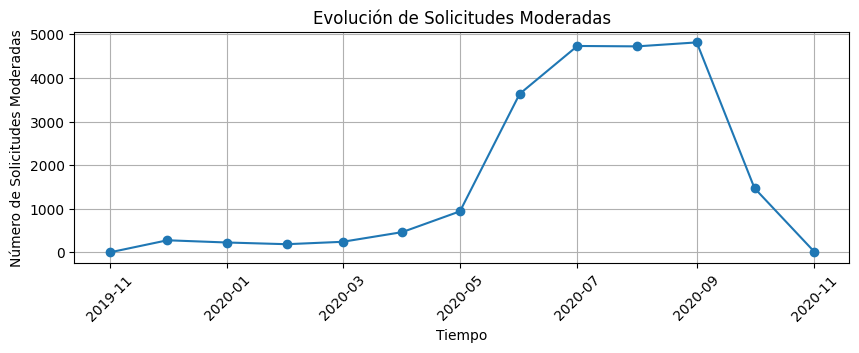

/tmp/ipykernel_455714/745684340.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderated['moderated_at_m'] = moderated['moderated_at'].dt.to_period('d')


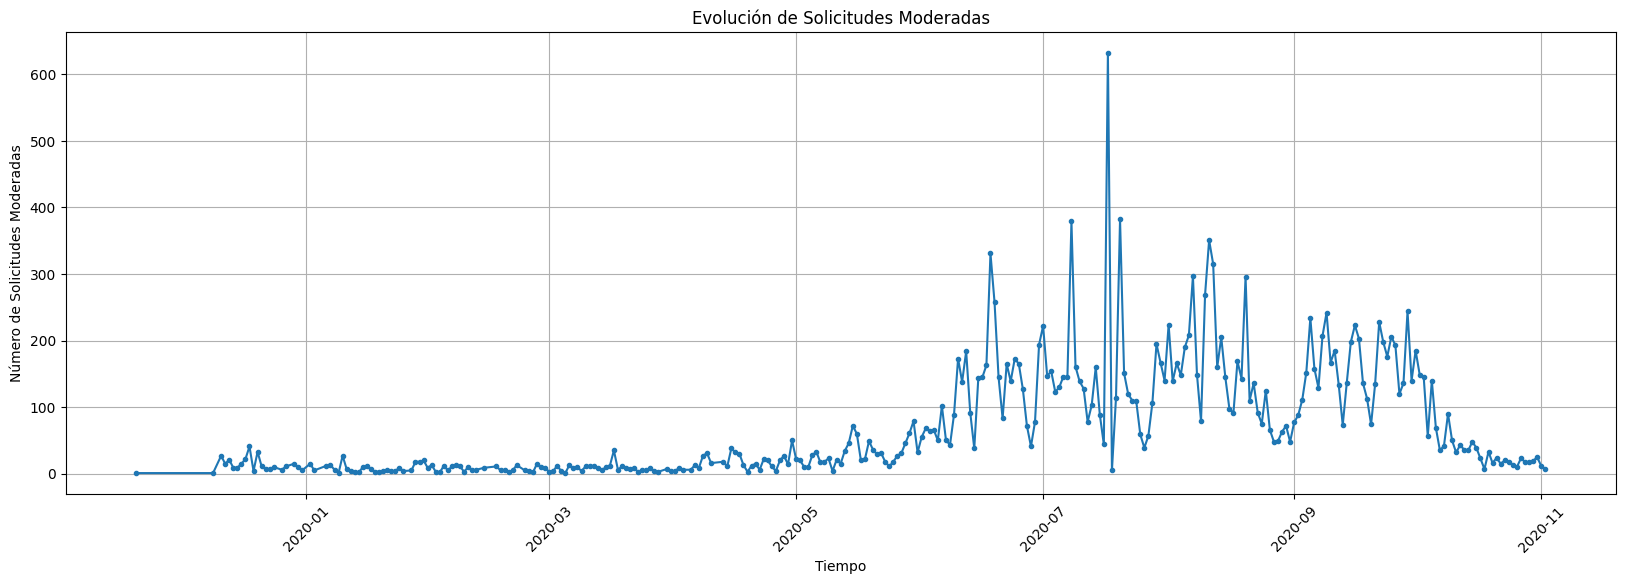

/tmp/ipykernel_455714/745684340.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderated['moderated_at_m'] = moderated['moderated_at'].dt.to_period('d')


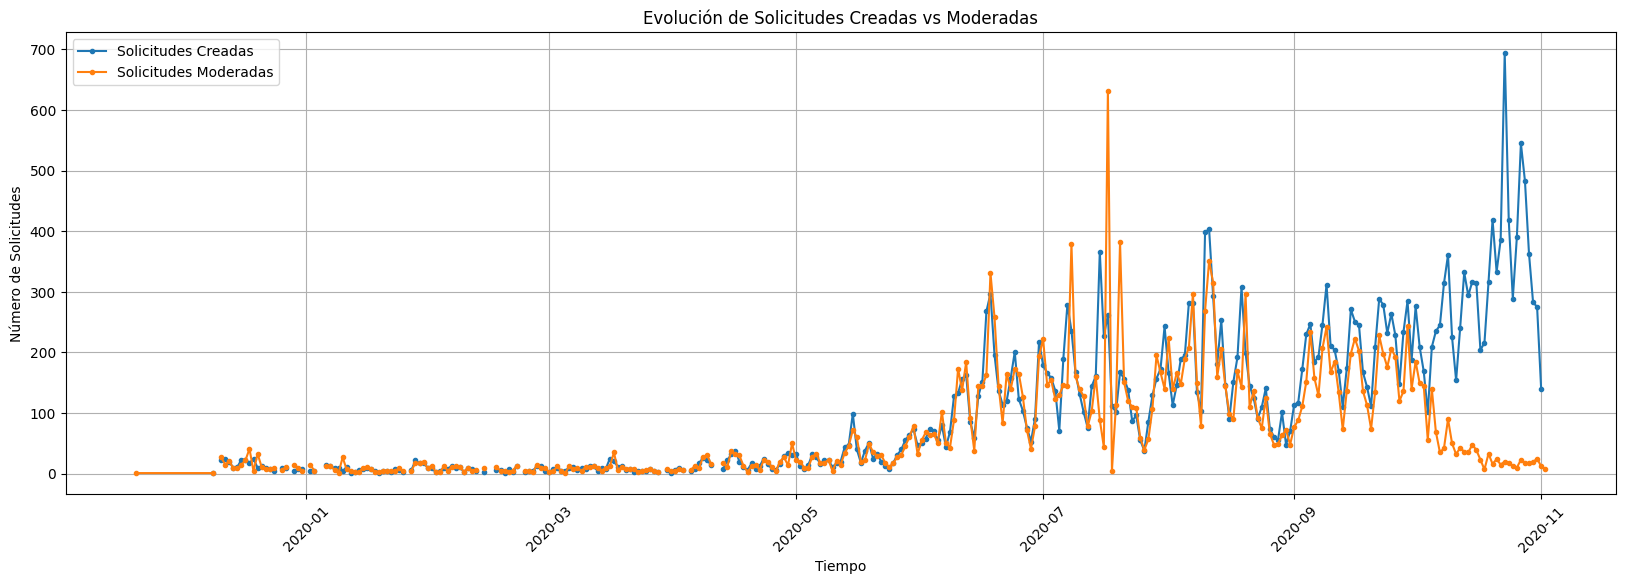

In [79]:
df = df_jo.copy().sort_values(['created_at','created_at_fe'])
#df.info()

# Dividir entre moderadas y no moderadas
moderated = df[df['moderated_at'].notnull()]
created_at = df[df['created_at'].notnull()]

# Agrupación por mes
moderated['moderated_at_m'] = moderated['moderated_at'].dt.to_period('M')  #M
#moderated['moderated_at_m'] = moderated['created_at'].dt.to_period('M')  #M

# Conteo de solicitudes moderadas por mes
moderation_time_series = moderated.groupby('moderated_at_m').size().reset_index(name='count')
# Conversión a datetime para graficar
moderation_time_series['moderated_at_m'] = moderation_time_series['moderated_at_m'].dt.to_timestamp()

plt.figure(figsize=(10, 3))
plt.plot(moderation_time_series['moderated_at_m'], moderation_time_series['count'], marker='o')
plt.title('Evolución de Solicitudes Moderadas')
plt.xlabel('Tiempo')
plt.ylabel('Número de Solicitudes Moderadas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Agrupación por dia
moderated['moderated_at_m'] = moderated['moderated_at'].dt.to_period('d')
moderation_time_series = moderated.groupby('moderated_at_m').size().reset_index(name='count')
moderation_time_series['moderated_at_m'] = moderation_time_series['moderated_at_m'].dt.to_timestamp()
plt.figure(figsize=(20, 6))
plt.plot(moderation_time_series['moderated_at_m'], moderation_time_series['count'], marker='.')
plt.title('Evolución de Solicitudes Moderadas')
plt.xlabel('Tiempo')
plt.ylabel('Número de Solicitudes Moderadas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Agrupación por dia
moderated['moderated_at_m'] = moderated['moderated_at'].dt.to_period('d')
created_at['created_at_m'] = created_at['created_at'].dt.to_period('d')

# Crear series de tiempo para las solicitudes moderadas y creadas
moderation_time_series = moderated.groupby('moderated_at_m').size().reset_index(name='count')
creation_time_series = created_at.groupby('created_at_m').size().reset_index(name='count')
#display(moderation_time_series.head(1))
#display(creation_time_series.head(1))

# Unir los dos dataframes para tener la fecha en ambos
merged_df = pd.merge(moderation_time_series, creation_time_series, left_on='moderated_at_m', right_on='created_at_m', how='outer')
#display(merged_df.head(1))
merged_df['moderated_at_m'] = merged_df['moderated_at_m'].dt.to_timestamp()
#display(merged_df.head(1))
# Crear un gráfico con dos líneas para mostrar la cantidad de solicitudes moderadas y creadas en cada día
plt.figure(figsize=(20, 6))
plt.plot(merged_df['moderated_at_m'], merged_df['count_y'], marker='.', label='Solicitudes Creadas')
plt.plot(merged_df['moderated_at_m'], merged_df['count_x'], marker='.', label='Solicitudes Moderadas')
plt.title('Evolución de Solicitudes Creadas vs Moderadas')
plt.xlabel('Tiempo')
plt.ylabel('Número de Solicitudes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

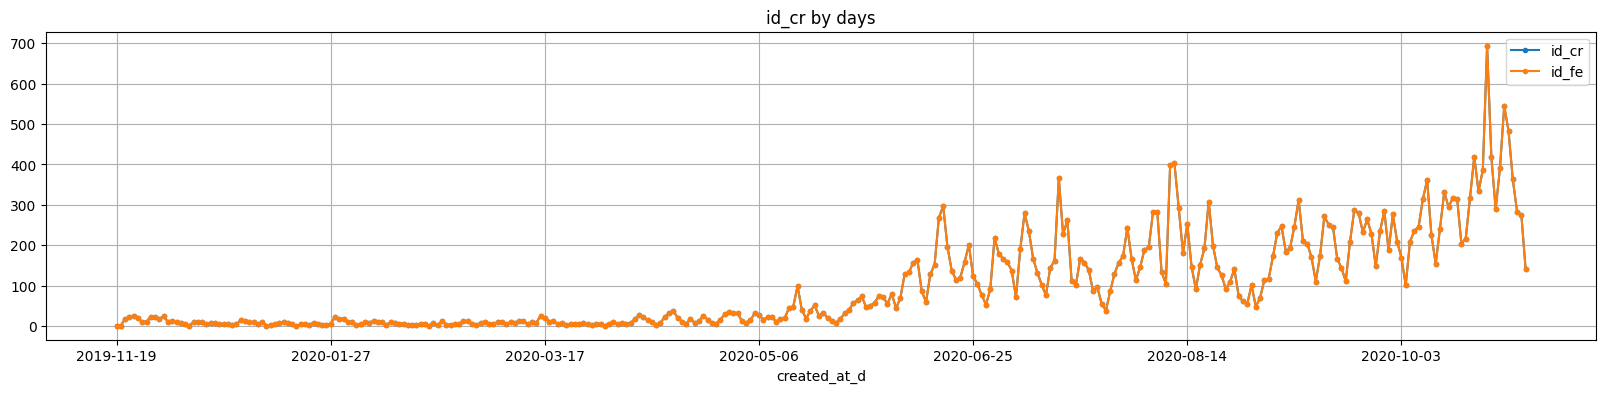

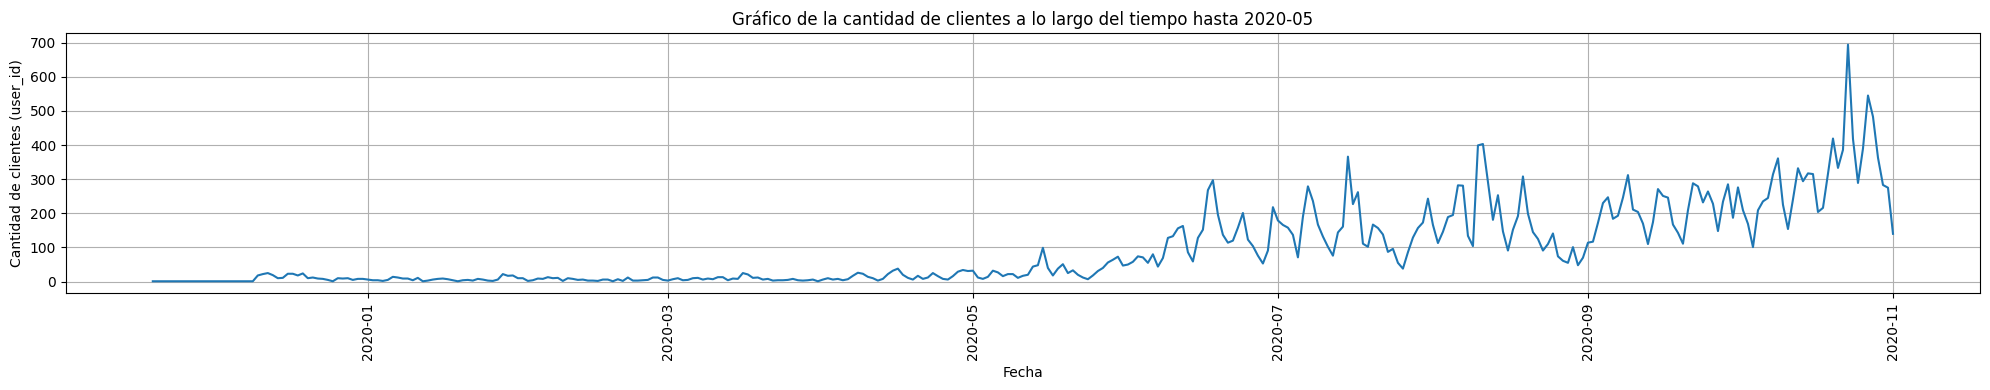

In [ ]:
df_t = pm.df('df_jo').sort_values(['created_at','created_at_fe'])
df_t['created_at_d'] = df_t['created_at'].dt.to_period('d').astype(str)
df_t['created_at_w'] = df_t['created_at'].dt.to_period('W-WED').astype(str)
df_t['created_at_m'] = df_t['created_at'].dt.to_period('M').astype(str)
#df_jo.info()
#display(df_t['created_at_d'])

#resultat = set.groupby(0)['index'].unique()
#fields = [v[0] for k, v in resultat.items()]
fields = ['id_cr','id_fe']

fig, ax= plt.subplots(figsize=(20,4))
plt.title('id_cr by days')
ratio_bag=df_t.groupby('created_at_d')[fields].count()
#display(ratio_bag)
ratio_bag.plot(kind='line',  marker='.', ax=ax ) # ,color=['green', 'orange']
plt.grid()
plt.show()


# TODO esta parece  erronea !!
# Agrupa los datos por fecha y calcula la cantidad de user_id
#grupos_fecha = df_jo.groupby('created_at')['user_id'].count()#.reset_index()
grupos_fecha = df_jo.groupby(df_jo['created_at'].dt.date)['user_id'].count()
#grupos_fecha = grupos_fecha[grupos_fecha.index < pd.to_datetime('2020-05').date()]
#display(grupos_fecha)
plt.figure(figsize=(20, 4))
plt.plot(grupos_fecha.index, grupos_fecha.values)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de clientes (user_id)')
plt.title('Gráfico de la cantidad de clientes a lo largo del tiempo hasta 2020-05')
#plt.yscale('log')
plt.xticks(rotation=90) # Rotula los eje x para que se vean bien
plt.tight_layout() # Ajusta el tamaño del gráfico para evitar cortes en las etiquetas
plt.grid()
plt.show()


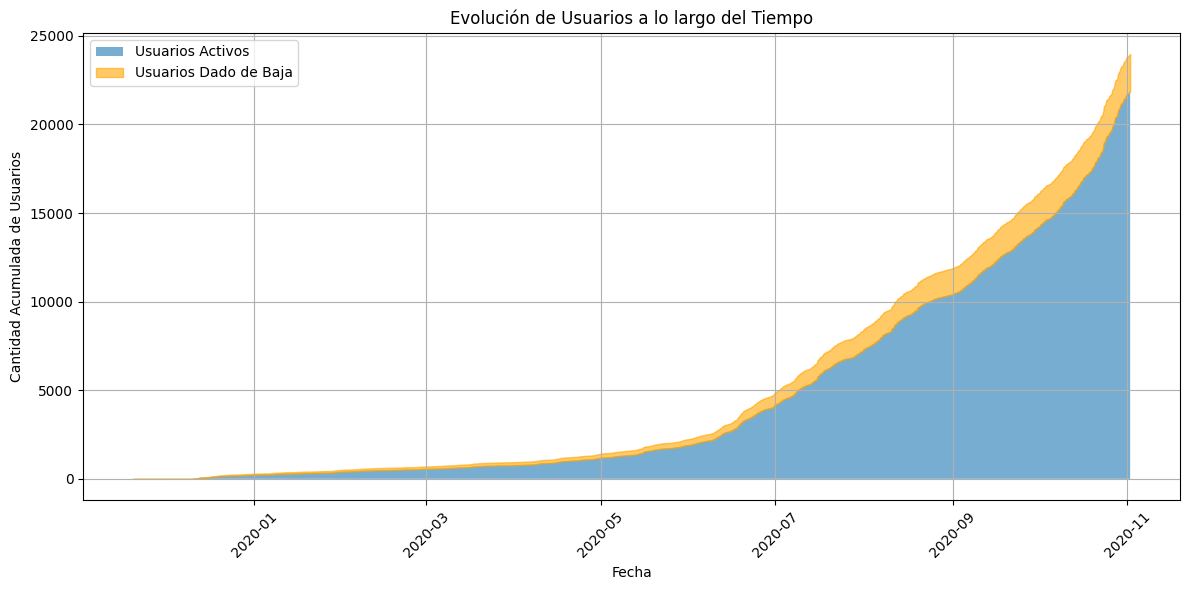

11938


In [16]:
df = pm.df('df_jo').sort_values(['created_at','created_at_fe'])
# Asegúrate de que la columna 'created_at' esté en formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Filtrar y agrupar datos
# Suponemos que 'active' indica si el usuario está activo: 1 = activo, 0 = dado de baja
user_activity = df.groupby(['created_at', 'active'])['user_id'].nunique().unstack(fill_value=0)

# Calcular el número acumulado de usuarios activos y dados de baja
user_activity['total_users'] = user_activity.sum(axis=1)
user_activity['cumulative_active'] = user_activity[1].cumsum()  # Usuarios activos acumulados
user_activity['cumulative_inactive'] = user_activity[0].cumsum()  # Usuarios inactivos acumulados

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Gráfico de área apilada para usuarios activos e inactivos
plt.fill_between(user_activity.index, user_activity['cumulative_active'], label='Usuarios Activos', alpha=0.6)
plt.fill_between(user_activity.index, user_activity['cumulative_inactive'] + user_activity['cumulative_active'], 
                 user_activity['cumulative_active'], label='Usuarios Dado de Baja', alpha=0.6, color='orange')

# Etiquetas y título
plt.title('Evolución de Usuarios a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Acumulada de Usuarios')
plt.legend()
plt.grid()

# Ajustar formato del eje X para fechas
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

count_user_id = df['user_id'].nunique()
print(count_user_id)

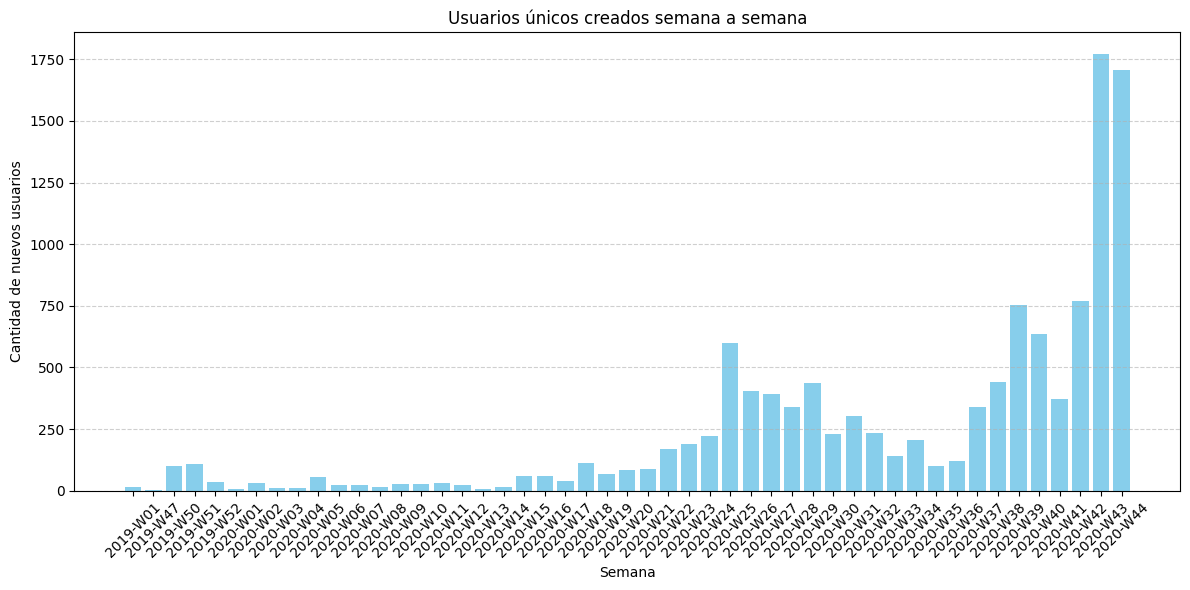

user_id
16391     37
15593     29
3045      28
23823     25
17144     25
          ..
103496     1
64005      1
103421     1
102737     1
897        1
Name: count, Length: 11938, dtype: int64


In [9]:
df = pm.df('df_jo')
# Crear columna de la semana del año
df['week'] = df['created_at'].dt.isocalendar().week
df['year'] = df['created_at'].dt.year

# Filtrar usuarios únicos por semana sin repetición previa
seen_users = set()
weekly_new_users = []

for week, group in df.groupby(['year', 'week']):
    # Filtrar los user_id únicos de la semana actual que no están en seen_users
    unique_users = group.loc[~group['user_id'].isin(seen_users), 'user_id'].unique()
    # Añadir los nuevos al conjunto acumulativo
    seen_users.update(unique_users)
    # Registrar el número de nuevos usuarios y la semana correspondiente
    weekly_new_users.append({'year_week': f"{week[0]}-W{week[1]:02d}", 'new_users': len(unique_users)})

# Convertir a DataFrame
weekly_data = pd.DataFrame(weekly_new_users)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.bar(weekly_data['year_week'], weekly_data['new_users'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Usuarios únicos creados semana a semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de nuevos usuarios')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
counts_user_id = df['user_id'].value_counts()
print(counts_user_id)


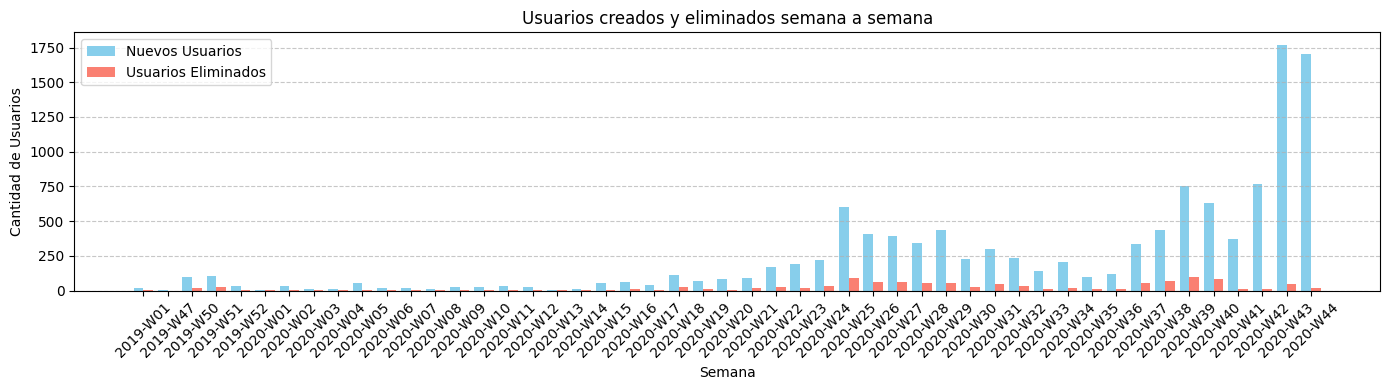

Total activos: 11938
Total eliminados: 1141


In [25]:
# Crear columna de la semana del año
df['week'] = df['created_at'].dt.isocalendar().week
df['year'] = df['created_at'].dt.year

# Filtrar usuarios únicos creados y eliminados semana a semana
seen_users_created = set()
seen_users_deleted = set()
weekly_user_stats = []

for week, group in df.groupby(['year', 'week']):
    # Nuevos usuarios creados
    unique_users_created = group.loc[~group['user_id'].isin(seen_users_created), 'user_id'].unique()
    seen_users_created.update(unique_users_created)

    # Usuarios eliminados (active == 0)
    unique_users_deleted = group.loc[
        (group['active'] == 0) & (~group['user_id'].isin(seen_users_deleted)), 'user_id'
    ].unique()
    seen_users_deleted.update(unique_users_deleted)

    # Registrar los datos
    weekly_user_stats.append({
        'year_week': f"{week[0]}-W{week[1]:02d}",
        'new_users': len(unique_users_created),
        'deleted_users': len(unique_users_deleted),
    })

# Convertir a DataFrame
weekly_data = pd.DataFrame(weekly_user_stats)

# Graficar los resultados con barras agrupadas
plt.figure(figsize=(14, 4))
bar_width = 0.4  # Ancho de las barras

# Posiciones de las barras en el eje X
x = range(len(weekly_data))

# Crear barras para nuevos usuarios
plt.bar([pos - bar_width / 2 for pos in x], weekly_data['new_users'], bar_width, label='Nuevos Usuarios', color='skyblue')

# Crear barras para usuarios eliminados
plt.bar([pos + bar_width / 2 for pos in x], weekly_data['deleted_users'], bar_width, label='Usuarios Eliminados', color='salmon')

# Personalización del gráfico
plt.title('Usuarios creados y eliminados semana a semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(x, weekly_data['year_week'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()
print(f"Total activos: {len(seen_users_created)}")
print(f"Total eliminados: {len(seen_users_deleted)}")

In [158]:
df_jo = pm.df('df_jo')
# Convert the 'created_at' and 'moderated_at' columns to datetime
#df_jo['created_at'] = pd.to_datetime(df_jo['created_at'])
#df_jo['moderated_at'] = pd.to_datetime(df_jo['moderated_at'])

# Group the data by 'created_at' date and calculate the counts
result = df_jo.groupby(pd.Grouper(key='created_at', freq='W')).apply(
    lambda x: pd.Series({
        'unique_id_cr': x['id_cr'].nunique(),
        'unique_id_cr_with_moderated_at': x['id_cr'][x['moderated_at'].notna()].nunique(),
        'unique_id_cr_need_manual_check_moderated': x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check_recov'] == 1)].nunique(),
        'unique_id_cr_need_manual_check': x['id_cr'][(x['needs_m_check_recov'] == 1)].nunique(),
        # Calculate the difference between unique_id_cr_need_manual_check and unique_id_cr_need_manual_check_moderated
        'difference_in_manual_check': x['id_cr'][(x['needs_m_check_recov'] == 1)].nunique() -
                                      x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check_recov'] == 1)].nunique(),
        # Calculate the efficiency of moderated_at
        'efficiency_of_moderated_at': (
            x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check_recov'] == 1)].nunique() / 
            x['id_cr'][x['moderated_at'].notna()].nunique() * 100  if x['id_cr'][x['moderated_at'].notna()].nunique() > 0 else 0
        ),
    })
).reset_index()

# Rename the columns to match the expected output
result.rename(columns={'created_at': 'date'}, inplace=True)

# Calculate the manual_check_percentage (unique_id_cr_with_moderated_at / unique_id_cr)
result['manual_check_percentage'] = (result['unique_id_cr_with_moderated_at'] / result['unique_id_cr']) * 100
#result

/tmp/ipykernel_455714/3208485105.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_jo.groupby(pd.Grouper(key='created_at', freq='W')).apply(


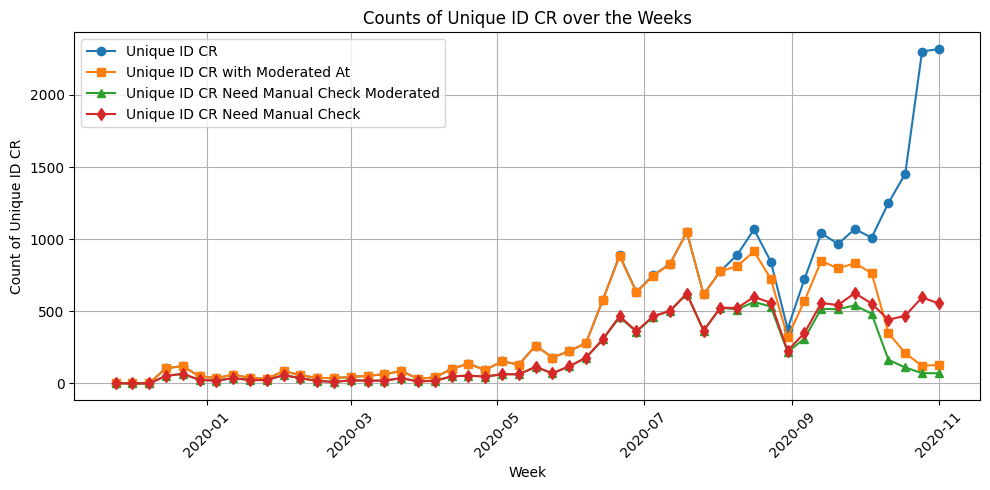

In [163]:
plt.figure(figsize=(10, 5)) # Set the figure size
# Plot the different series over time (weeks)
plt.plot(result['date'], result['unique_id_cr'], label='Unique ID CR', marker='o')
plt.plot(result['date'], result['unique_id_cr_with_moderated_at'], label='Unique ID CR with Moderated At', marker='s')
plt.plot(result['date'], result['unique_id_cr_need_manual_check_moderated'], label='Unique ID CR Need Manual Check Moderated', marker='^')
plt.plot(result['date'], result['unique_id_cr_need_manual_check'], label='Unique ID CR Need Manual Check', marker='d')
# Add labels and title
plt.xlabel('Week')
plt.ylabel('Count of Unique ID CR')
plt.title('Counts of Unique ID CR over the Weeks')
plt.xticks(rotation=45) # Rotate the x-axis labels for better visibility
plt.legend() # Add a legend
plt.tight_layout() # Show the plot
plt.grid()
plt.show()

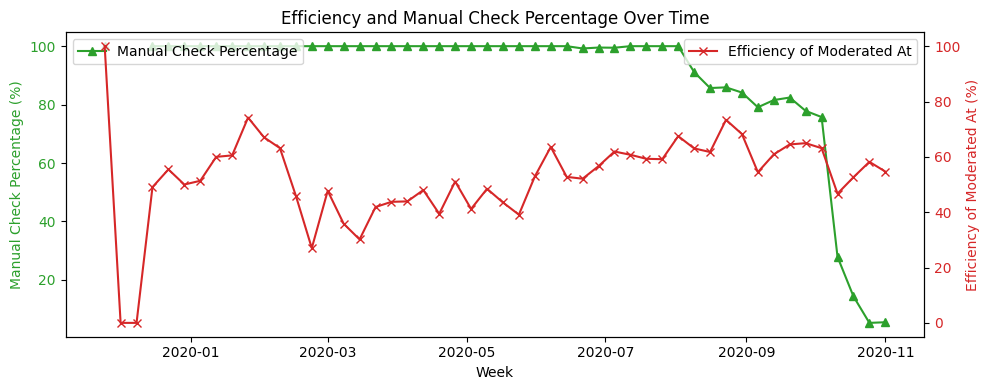

In [162]:
fig, ax1 = plt.subplots(figsize=(10, 4)) # Plot the efficiency and manual check percentage metrics
# Plot manual_check_percentage on the first axis (ax1)
ax1.plot(result['date'], result['manual_check_percentage'], label='Manual Check Percentage', marker='^', color='tab:green')
# Add labels and title for the first y-axis
ax1.set_xlabel('Week')
ax1.set_ylabel('Manual Check Percentage (%)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2 = ax1.twinx() # Create a second y-axis to plot the efficiency metric
# Plot efficiency_of_moderated_at on the second axis (ax2)
ax2.plot(result['date'], result['efficiency_of_moderated_at'], label='Efficiency of Moderated At', marker='x', color='tab:red')
ax2.set_ylabel('Efficiency of Moderated At (%)', color='tab:red') # Add labels for the second y-axis
ax2.tick_params(axis='y', labelcolor='tab:red')
# Add a title and legend
plt.title('Efficiency and Manual Check Percentage Over Time')
fig.tight_layout()
plt.xticks(rotation=45) # Rotate x-axis labels for better visibility
# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()  # Show the plot